In [1]:
'''1.In which year did the most helicopter prison break attempts occur?
2.In which countries do the most attempted helicopter prison escapes occur?'''

'1.In which year did the most helicopter prison break attempts occur?\n2.In which countries do the most attempted helicopter prison escapes occur?'

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
def data_from_url(url,tag_name,class_name):
    response = requests.get(url)
    if response.status_code != 200:
        print('HTTP 404: Page not found')
    else:
        soup = BeautifulSoup(response.text,'html.parser')
        html_output = soup.find(tag_name,{'class':class_name})
        output = pd.read_html(str(html_output))
    return output[0]

In [5]:
escape_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         48 non-null     object
 1   Prison name  48 non-null     object
 2   Country      48 non-null     object
 3   Succeeded    48 non-null     object
 4   Escapee(s)   48 non-null     object
 5   Details      48 non-null     object
dtypes: object(6)
memory usage: 2.4+ KB


In [6]:
escape_data['Date']=pd.to_datetime(escape_data['Date'])
escape_data

Date                                        Prison name  \
0  1971-08-19                              Santa Martha Acatitla   
1  1973-10-31                                      Mountjoy Jail   
2  1978-05-24                 United States Penitentiary, Marion   
3  1981-02-27             Fleury-Mérogis, Essonne, Ile de France   
4  1981-05-07                    Orsainville Prison, Quebec City   
5  1983-01-01                              Pentridge (HM Prison)   
6  1985-12-19  Perry Correctional Institution, Pelzer, South ...   
7  1985-12-31  Cândido Mendes penitentiary, Ilha Grande, Rio ...   
8  1986-05-26                                 Prison de la Santé   
9  1986-11-05           Federal Correctional Institution, Dublin   
10 1986-11-23                         Prigione di Rebibbia, Roma   
11 1987-12-10                                Gartree (HM Prison)   
12 1988-07-11                                    Santa Fe prison   
13 1989-04-17                Federal Holding Facility, Miami, FL   
14 1989-08-19              Arkansas Valley Correctional Facility   
15 1990-06-19                Kent Penitentiary, British Columbia   
16 1991-04-07        Rio Piedras State Penitentiary, Puerto Rico   
17 1992-02-24                                        Lyon Prison   
18 1992-12-01                     Touraine Central Prison, Tours   
19 1993-06-17                     Touraine Central Prison, Tours   
20 1996-12-30                     High Security Prison, Santiago   
21 1997-09-18                                  De Geerhorst jail   
22 1999-03-25           Metropolitan Remand and Reception Centre   
23 2000-06-05  Martin Treatment Center for Sexually Violent P...   
24 2000-12-13                                        Lyon prison   
25 2001-01-19                                      Luynes prison   
26 2001-03-24                                  Draguignan prison   
27 2001-05-28                                     Fresnes prison   
28 2002-01-17                           Parada Neto Penitentiary   
29 2002-12-30                   Las Cucharas prison, Puerto Rico   
30 2003-04-04                                      Luynes prison   
31 2005-07-01                                             France   
32 2005-12-10                                       Aiton Prison   
33 2006-06-06                                  Korydallos Prison   
34 2007-04-15                               Lantin Prison, Liège   
35 2007-07-15                                      Grasse prison   
36 2007-10-28                                       Ittre prison   
37 2009-02-22                                  Korydallos Prison   
38 2009-04-27                           Domenjod Prison, Réunion   
39 2009-07-23                                             Bruges   
40 2010-06-25             HM Prison Isle of Wight, Isle of Wight   
41 2012-03-22                          Sheksna, Penal colony N17   
42 2013-02-24                            Trikala Prison, Trikala   
43 2013-03-17            Saint-Jérôme Detention Facility, Quebec   
44 2014-06-07             Orsainville Detention Facility, Quebec   
45 2016-02-22                                              Thiva   
46 2018-07-01                                   Réau, near Paris   
47 2020-09-25                            Forest prison, Brussels   

           Country Succeeded  \
0           Mexico       Yes   
1          Ireland       Yes   
2    United States        No   
3           France       Yes   
4           Canada        No   
5        Australia        No   
6    United States       Yes   
7           Brazil       Yes   
8           France       Yes   
9    United States       Yes   
10           Italy       Yes   
11  United Kingdom       Yes   
12   United States       Yes   
13   United States        No   
14   United States       Yes   
15          Canada       Yes   
16     Puerto Rico       Yes   
17          France       Yes   
18          France        No   
19          France        No   
20  

In [7]:
escape_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         48 non-null     datetime64[ns]
 1   Prison name  48 non-null     object        
 2   Country      48 non-null     object        
 3   Succeeded    48 non-null     object        
 4   Escapee(s)   48 non-null     object        
 5   Details      48 non-null     object        
dtypes: datetime64[ns](1), object(5)
memory usage: 2.4+ KB


In [18]:
# Pison Breaks Per Year

escape_year_data = escape_data['Date'].dt.year.value_counts()
escape_year_data

2009    3
2001    3
1986    3
2007    3
2002    2
1981    2
2000    2
1985    2
2005    2
2013    2
1989    2
1992    2
2006    1
1971    1
2010    1
2003    1
2014    1
2016    1
2018    1
2012    1
1999    1
1973    1
1997    1
1996    1
1993    1
1991    1
1990    1
1988    1
1987    1
1983    1
1978    1
2020    1
Name: Date, dtype: int64

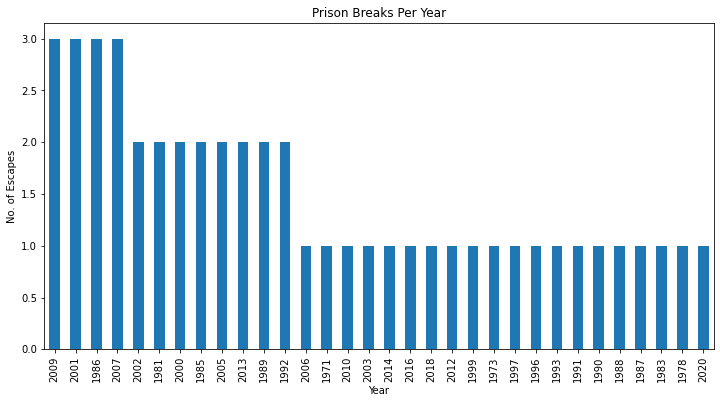

In [20]:
# Pison Breaks Per Year

escape_year_plot = escape_year_data.plot(kind='bar',xlabel = 'Year',ylabel = 'No. of Escapes',title = 'Prison Breaks Per Year',figsize = (12,6))

In [22]:
# Prison Breaks per Country

escape_country_data = escape_data['Country'].value_counts()
escape_country_data

France            15
United States      8
Canada             4
Greece             4
Belgium            4
Australia          2
Brazil             2
United Kingdom     2
Mexico             1
Ireland            1
Italy              1
Puerto Rico        1
Chile              1
Netherlands        1
Russia             1
Name: Country, dtype: int64

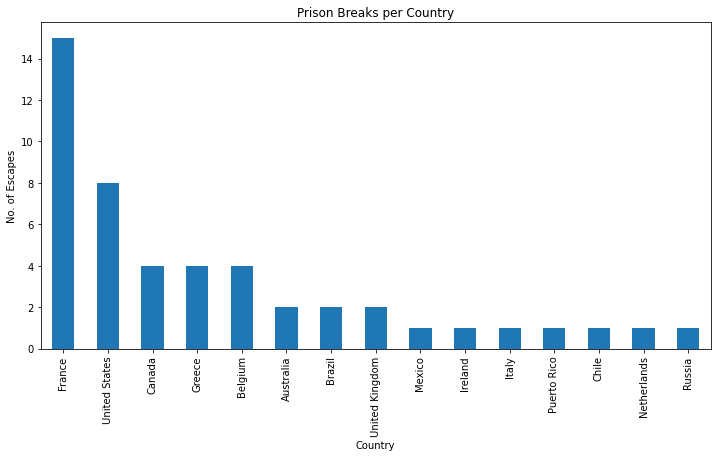

In [23]:
# Prison Breaks per Country

escape_country_plot = escape_country_data.plot(kind='bar',xlabel = 'Country',ylabel = 'No. of Escapes',title = 'Prison Breaks per Country',figsize = (12,6))
